# Laboratorio 1 Introducción a Grafos con Networkx

Puedes utilizar NetworkX para construir y dibujar gráficos no dirigidos o dirigidos, con aristas ponderadas o no ponderadas. Hay una variedad de funciones disponibles para analizar grafos. Este tutorial te guiará a través de algunos ejemplos y ejercicios básicos.


## Documentación oficial para la versión utilizada en este tutorial:
https://networkx.github.io/documentation/networkx-2.2/

## Tutorial oficial para la versión utilizada en este tutorial:
https://networkx.github.io/documentation/networkx-2.2/tutorial.html

Contenidos:

1.   Creación de Grafos
2.   Funciones y Métodos de Networkx
3.   Grafos Dirigidos
4.   Grafos con Pesos


# Instalar e importar la librería `networkx`

Recuerda que las librerías a importar (`import`) van en la parte superior de tu código, indicándole a Python que cargue un módulo externo. En este caso, queremos cargar NetworkX, pero le damos un alias corto, `nx`, ya que tendremos que escribirlo repetidamente, de ahí la declaración `as`.

Las líneas que comienzan con el carácter `%` no son código Python; son directivas "mágicas" para el cuaderno Jupyter. La directiva mágica `%matplotlib inline` le indica al cuaderno Jupyter que dibuje gráficos en línea, es decir, en el propio cuaderno. Esta directiva debe usarse justo después de la declaración de la librería.

En caso de que no poseas la librearía networkx instalada debes correr el siguiente código.

Procedemos entonces a importar la librería.

In [2]:
import networkx as nx
%matplotlib inline

# Creando y dibujando grafos no dirigidos

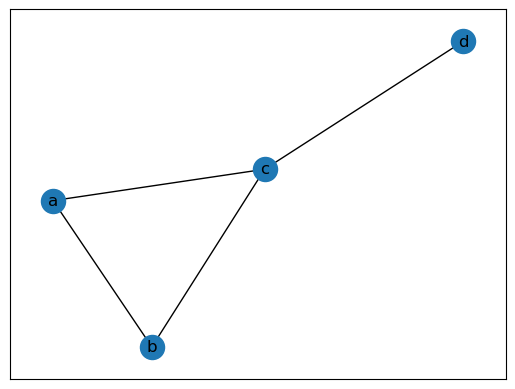

In [4]:
# Un grafo "plain" es no dirigido
G = nx.Graph()

# Asigna un 'nombre' a cada nodo, que en este caso es una letra.
G.add_node('a')

# El método add_nodes_from permite agregar nodos desde una secuencia, en este caso, una lista.
nodos_a_agregar = ['b', 'c', 'd']
G.add_nodes_from(nodos_a_agregar)

# Agrega una arista de 'a' a 'b'
# Dado que este grafo es no dirigido, el orden no importa aquí.
G.add_edge('a', 'b')

# Al igual que add_nodes_from, podemos agregar aristas desde una secuencia
# Las aristas deben especificarse como tuplas de 2 elementos.
aristas_a_agregar = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(aristas_a_agregar)

# Dibuja el grafo
nx.draw_networkx(G, with_labels=True)



Hay muchos argumentos opcionales para la función de dibujo que permiten personalizar la apariencia.

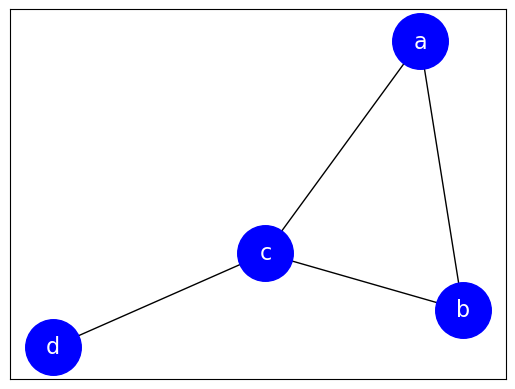

In [5]:
nx.draw_networkx(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

# Métodos del grafo

El objeto grafo tiene algunas propiedades y métodos que proporcionan información sobre el grafo completo.

In [6]:
# Lista de todos los nodos
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [7]:
# Lista de todas las aristas
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

Los objetos NodeView y EdgeView tienen iteradores, por lo que podemos usarlos en bucles for:

In [8]:
print("Nodos: ")
for node in G.nodes:
    print(node)

print("Aristas: ")
for edge in G.edges:
    print(edge)

Nodos: 
a
b
c
d
Aristas: 
('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


Ten en cuenta que las aristas se proporcionan como tuplas de 2 elementos, de la misma manera en que las ingresamos.

Podemos obtener el número de nodos y aristas en un grafo utilizando los métodos `number_of_`

In [9]:
print("Número de Nodos:", G.number_of_nodes())
print("Número de Aristas:", G.number_of_edges())

Número de Nodos: 4
Número de Aristas: 4


Algunos métodos del grafo toman una arista o un nodo como argumento. Estos proporcionan las propiedades del grafo de la arista o nodo dado. Por ejemplo, el método `.neighbors() `devuelve los nodos vinculados al nodo dado:

In [10]:
# lista de vecinos del nodo 'b'
print(G.neighbors('b'))

# Por razones de rendimiento, muchos métodos de grafo devuelven iteradores en lugar de listas.
# Son convenientes para recorrer en bucles:

for neighbor in G.neighbors('b'):
    print(neighbor)


# Siempre puedes usar la función list() para crear una lista a partir de un iterador:

list(G.neighbors('b'))

a
c


['a', 'c']

# Funciones de NetworkX vs. Métodos de grafo

Los datos anteriores están disponibles a través de *métodos* de grafo, es decir, se llaman desde el objeto grafo:

    G.<nombre_del_metodo>(<argumentos>)

Si bien varios de los métodos más utilizados de NetworkX se proporcionan como métodos, muchos otros son funciones del módulos y se llaman así:

    nx.<nombre_de_la_funcion>(G, <argumentos>)

es decir, con el grafo proporcionado como el primer argumento, y tal vez el único. Aquí hay un par de ejemplos de funciones de módulo de NetworkX que proporcionan información sobre un grafo:

In [11]:
nx.is_tree(G)

False

In [12]:
nx.is_connected(G)

True

# Existencia de nodo y arista

Para verificar si un nodo está presente en un grafo, puedes usar el método `has_node()`:


In [13]:
print(G.has_node('a'))
print(G.has_node('x'))

# Además, la sintaxis de bucle utilizada anteriormente:
# for n in G.nodes sugiere otra forma de verificar si un nodo está en un grafo:
print('d' in G.nodes)

True
False
True


Del mismo modo, podemos verificar si dos nodos están conectados por una arista:

In [14]:
print(G.has_edge('a', 'b'))
print(G.has_edge('a', 'd'))

print(('c', 'd') in G.edges)

True
False
True


# Creando Grafos Dirigidos
Para crear grafos dirigidos lo realizamos mediante la función `.DiGraph()`

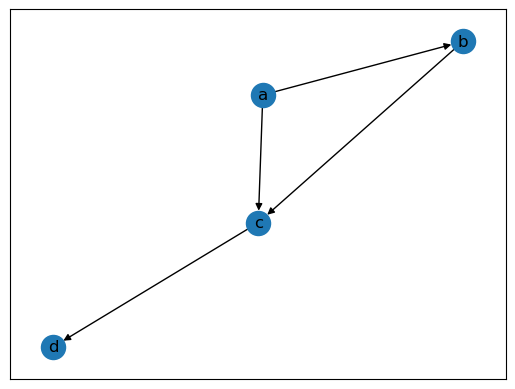

In [15]:
# Un grafo Dirigido
G = nx.DiGraph()

# Asigna un 'nombre' a cada nodo, que en este caso es una letra.
G.add_node('a')

# El método add_nodes_from permite agregar nodos desde una secuencia, en este caso, una lista.
nodos_a_agregar = ['b', 'c', 'd']
G.add_nodes_from(nodos_a_agregar)

# Agrega una arista de 'a' a 'b'
# Dado que este grafo es dirigido, el orden SI importa aquí,
#el primer elemento sería el Nodo donde comienza la arista
G.add_edge('a', 'b')

# Al igual que add_nodes_from, podemos agregar aristas desde una secuencia
# Las aristas deben especificarse como tuplas de 2 elementos.
aristas_a_agregar = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(aristas_a_agregar)

# Dibuja el grafo
nx.draw_networkx(G, with_labels=True)

Todas los métodos y funciones anteriormente vistos también funcionan para grafos dirigidos. Ahora al tener aristas direccionadas, podemos agregar el concepto de aristas entrantes `.in_edges()` y aristas salientes `.out_edges()`

In [16]:
# Para este caso .in_edges(), .out_edges() y .edges() generan la misma salida
print(G.in_edges())

# Esto tiene más sentido cuando calculamos las aristas entrantes  de un nodo
print(G.in_edges("c"))


[('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')]
[('a', 'c'), ('b', 'c')]


# Creando Grafos con Pesos
Para crear grafos con pesos no dirigidos lo realizamos mediante la función `.Graph()` (para grafos dirigidos `.DiGraph()`), para agregar el peso a la aristas lo asignamos mediante el argumento "weight" al agregar un nodo.

{('a', 'b'): Text(0.24895632208160384, -0.5948406653840597, '0.5'),
 ('a', 'c'): Text(-0.1627500174364969, -0.2337190972013955, '0.3'),
 ('b', 'c'): Text(0.12153845393023144, -0.17143967417086559, '0.2'),
 ('c', 'd'): Text(-0.2489579032038137, 0.5948465436969783, '0.5')}

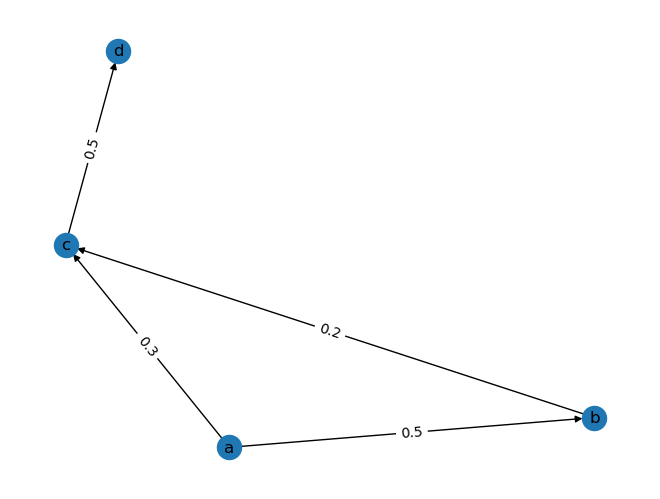

In [17]:
# Un grafo Dirigido
G = nx.DiGraph()

# Asigna un 'nombre' a cada nodo, que en este caso es una letra.
G.add_node('a')

# El método add_nodes_from permite agregar nodos desde una secuencia, en este caso, una lista.
nodos_a_agregar = ['b', 'c', 'd']
G.add_nodes_from(nodos_a_agregar)

# Agrega una arista de 'a' a 'b'
# Dado que este grafo es dirigido, el orden SI importa aquí,
#el primer elemento sería el Nodo donde comienza la arista
G.add_edge('a', 'b', weight = 0.5)

# Al igual que add_nodes_from, podemos agregar aristas desde una secuencia
# Las aristas deben especificarse como tuplas de 3 elementos.
aristas_a_agregar = [('a', 'c', 0.3), ('b', 'c', 0.2), ('c', 'd', 0.5)]
G.add_weighted_edges_from(aristas_a_agregar)

pos=nx.spring_layout(G)

nx.draw(G,pos, with_labels=True)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)